Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
231 70


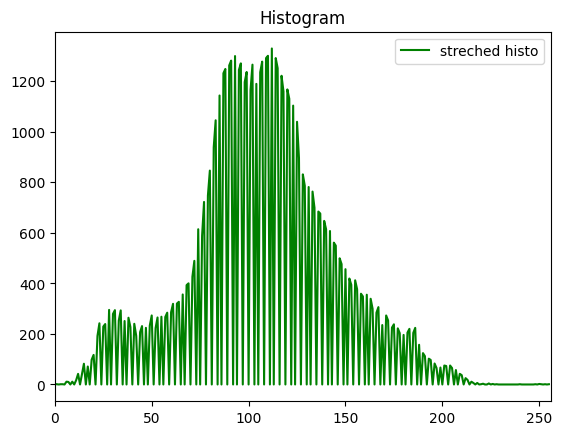

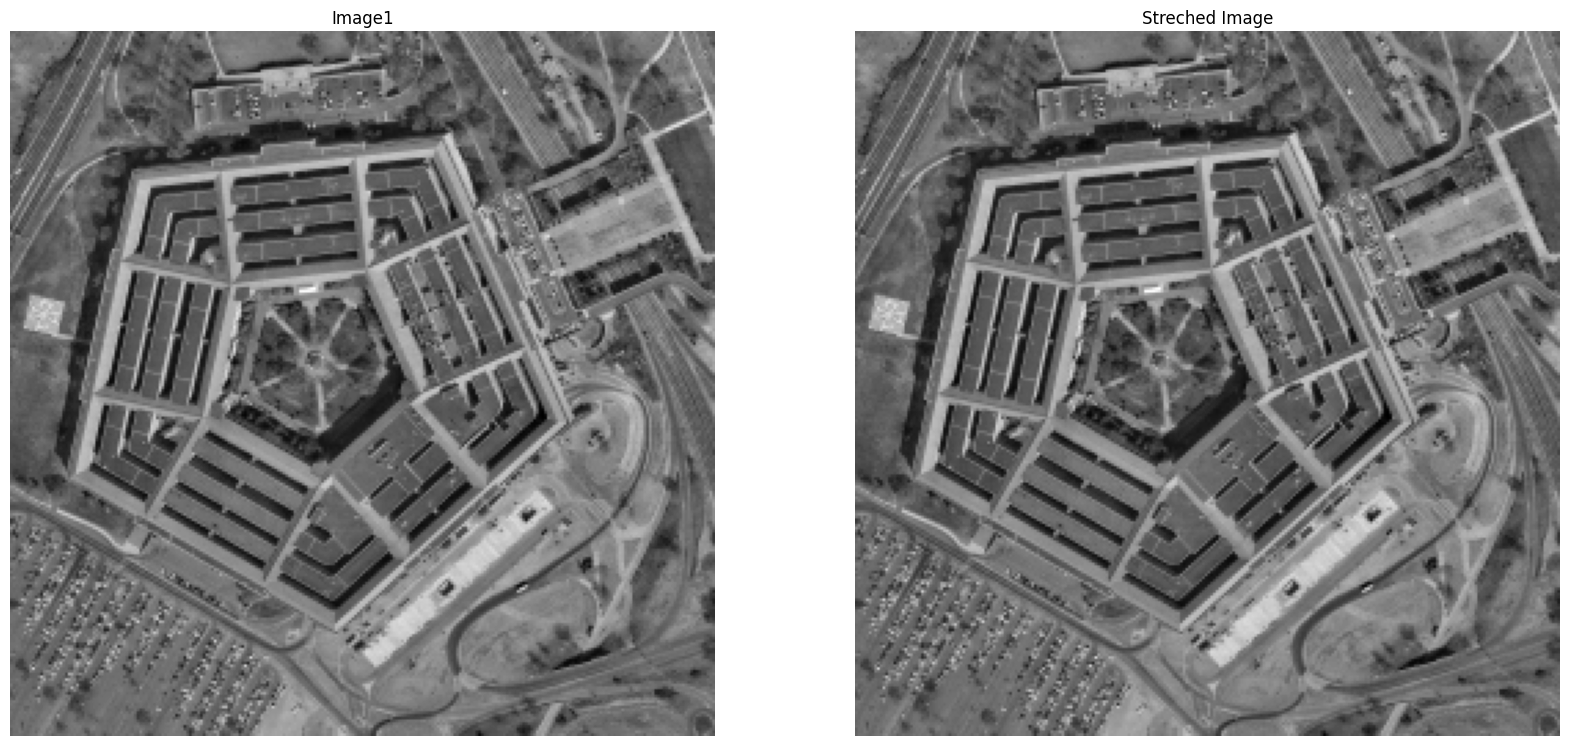

In [5]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive')

#img = cv2.imread('/content/gdrive/My Drive/Colab/Images/skin/001.jpg')
img = cv2.imread('/content/gdrive/My Drive/Colab/Images/pentagon.bmp')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 출력 이미지의 모양은 gray_img.shape[:2]를 사용하여 얻은 높이와 너비인 회색 이미지와 같아야 합니다.
output_img = np.zeros(gray_img.shape[:2])

def saturation(value):
    if(value>255):
       value = 255;
    return value

Nmax=255
Nmin=0
max = 0
min = 255

for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        if (max < gray_img[h,w]):
            max = gray_img[h,w]
        if (min > gray_img[h,w]):
            min = gray_img[h,w]

for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        if gray_img[h,w] < min:
           gray_img[h,w] = min
        if gray_img[h,w] > max:
           gray_img[h,w] = max

for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        output_img[h,w] = saturation(np.int32(np.float32(gray_img [h,w]-min)*np.float32((Nmax-Nmin)/(max-min))+Nmin))

print(max,min)
hist=cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.title("Histogram")
#plt.plot(hist,color='b',label='original histo')
#plt.xlim([0,256])
hist=cv2.calcHist([output_img.astype(np.uint8)],[0],None,[256],[0,256])
plt.plot(hist,color='g',label='streched histo')
plt.xlim([0,256])
plt.legend()

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Streched Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)